## Assignment
Select an outcome variable and then pick four or five other variables (one to two categorical, three to four continuous) to act as the basis for features. Explore the variables using the univariate and bivariate methods you've learned so far.

Next, based on what you learned via your data exploration, create ten new features. Explain the reasoning behind each one.

Finally, use filtering methods to select the five best features and justify your choices.

Dataset contains flight data from 2008, downloaded from http://stat-computing.org/dataexpo/2009/the-data.html

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats

In [2]:
# flight data from 2008, narrowed to more manageable size
flights = pd.read_csv('~/Desktop/Data_Science/2008.csv')

In [3]:
flights.shape

(7009728, 29)

In [4]:
#Lots of data, take 10% sample 10%
flights = flights.iloc[0:700973, ]

In [5]:
flights.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,...,4.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,...,5.0,10.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,620,804.0,750,WN,448,...,3.0,17.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,926.0,930,1054.0,1100,WN,1746,...,3.0,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,...,3.0,10.0,0,NaN,0,2.0,0.0,0.0,0.0,32.0


In [6]:
flights.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

## Variable Selection

### Outcome Variable 
Arrival Delay ('ArrDelay')

### Categorical Variables
Day of the Week ('DayOfWeek')
Airline Carrier Company Code ('UniqueCarrier')

### Continuous Variables
Time in the Air ('AirTime')
Travel Distance ('Distance')
Departure Delay ('DepDelay')
Scheduled Elapsed Time ('CRSElapsedTime')

## Univariate Explorations

### Arrival Delay
'ArrDelay'

In [7]:
flights['ArrDelay'].describe()

count    680192.000000
mean         10.234673
std          39.382096
min         -91.000000
25%          -9.000000
50%           0.000000
75%          15.000000
max        1525.000000
Name: ArrDelay, dtype: float64

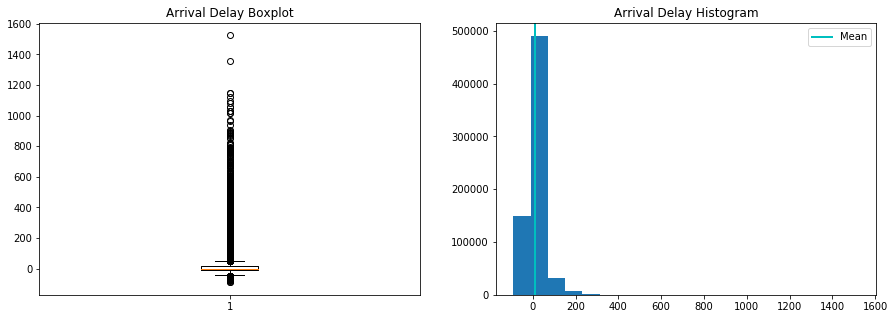

In [8]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.boxplot(flights['ArrDelay'].dropna(how = 'any'))
plt.title('Arrival Delay Boxplot')

plt.subplot(1, 2, 2)
plt.hist(flights['ArrDelay'].dropna(how = 'any'), bins=20)
plt.axvline(flights['ArrDelay'].mean(), color='c', linestyle='solid', linewidth=2, label="Mean")
plt.legend(loc='upper right')
plt.title('Arrival Delay Histogram')

plt.show()

Average arrival delay is 10 minutes.  Lots of outliers.

### Day of the Week
'DayOfWeek'

Day of the Week applies a numeric value to each day, 1 (Monday) - 7 (Sunday)

In [9]:
print('Average number of flights per day of the week:', flights['DayOfWeek'].value_counts().mean())
print(flights['DayOfWeek'].value_counts())

Average number of flights per day of the week: 100139.0
4    116527
3    114553
2    111989
5     96669
1     95524
7     89628
6     76083
Name: DayOfWeek, dtype: int64


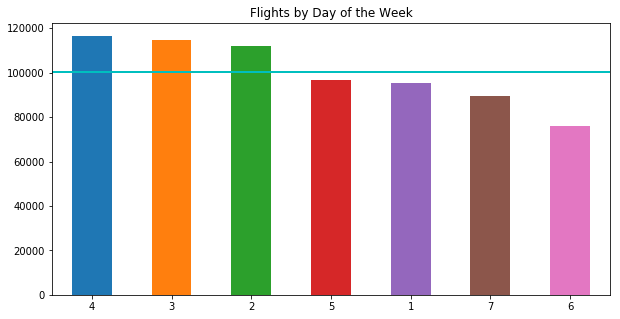

In [10]:
plt.figure(figsize=(10, 5))

plt.title('Flights by Day of the Week')
pd.value_counts(flights['DayOfWeek']).plot.bar()
plt.axhline(flights['DayOfWeek'].value_counts().mean(), color='c', linestyle='solid', linewidth=2, label="Mean")
plt.xticks(rotation = 0)

plt.show()

Average number of flights listed per day is just over 100,000. Tuesday, Wednesday and Thursday have more flights listed.  Saturday has the fewest.

### Airline Carrier Company Code
'UniqueCarrier'

In [11]:
print('Average number of flights per Airline Carrier:', flights['UniqueCarrier'].value_counts().mean())
print(flights['UniqueCarrier'].value_counts())

Average number of flights per Airline Carrier: 35048.65
WN    190478
AA     52410
OO     48992
MQ     43454
XE     41184
US     39226
DL     38256
UA     38026
NW     30908
CO     25177
EV     23115
9E     22848
YV     22161
FL     20519
OH     18644
B6     16447
AS     12729
F9      7692
HA      4679
AQ      4028
Name: UniqueCarrier, dtype: int64


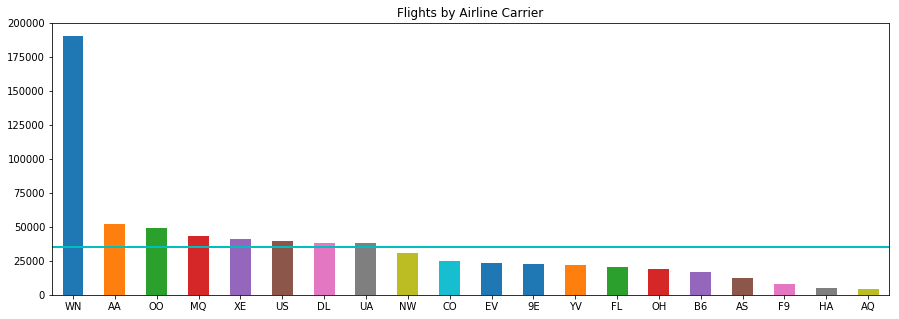

In [12]:
plt.figure(figsize=(15, 5))

plt.title('Flights by Airline Carrier')
pd.value_counts(flights['UniqueCarrier']).plot.bar()
plt.axhline(flights['UniqueCarrier'].value_counts().mean(), color='c', linestyle='solid', linewidth=2, label="Mean")
plt.xticks(rotation = 0)

plt.show()

The average number of flights listed by airline is just over 35,000.  Airline WN (Southwest) is over-represented with a total of over 190,000 flights.  Additional airlines are listed more frequently than the average: AA (American), OO (Skywest), MQ (American Eagle), XE (Express Jet), US (US Airways), DL (Delta) and UA (United)

### Time in the Air
'AirTime'

In [13]:
flights['AirTime'].describe()

count    680192.000000
mean        102.787875
std          66.164684
min           0.000000
25%          55.000000
50%          84.000000
75%         132.000000
max         645.000000
Name: AirTime, dtype: float64

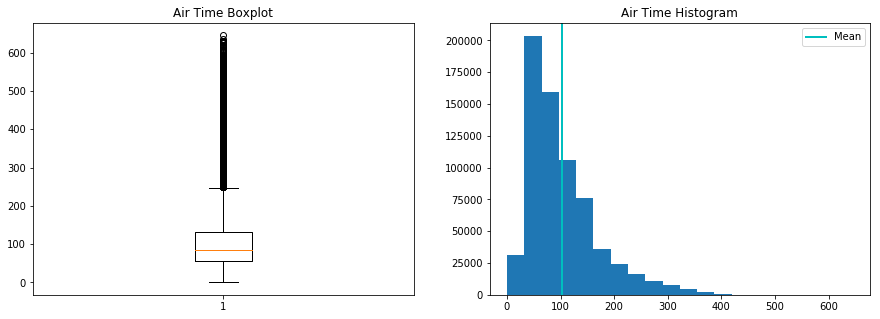

In [14]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.boxplot(flights['AirTime'].dropna(how = 'any'))
plt.title('Air Time Boxplot')

plt.subplot(1, 2, 2)
plt.hist(flights['AirTime'].dropna(how = 'any'), bins=20)
plt.axvline(flights['AirTime'].mean(), color='c', linestyle='solid', linewidth=2, label="Mean")
plt.legend(loc='upper right')
plt.title('Air Time Histogram')

plt.show()

Most flights spend less than 100 minutes in the air.  The longest flight spends 645 minutes.  The existance of flights with 0 airtime likely indicates that some flights are so short, they never reach cruising altitude are instead either on ascent or descent throughout the flight.

### Travel Distance
'Distance'

In [15]:
flights['Distance'].describe()

count    700973.000000
mean        707.773603
std         543.570804
min          24.000000
25%         323.000000
50%         552.000000
75%         938.000000
max        4962.000000
Name: Distance, dtype: float64

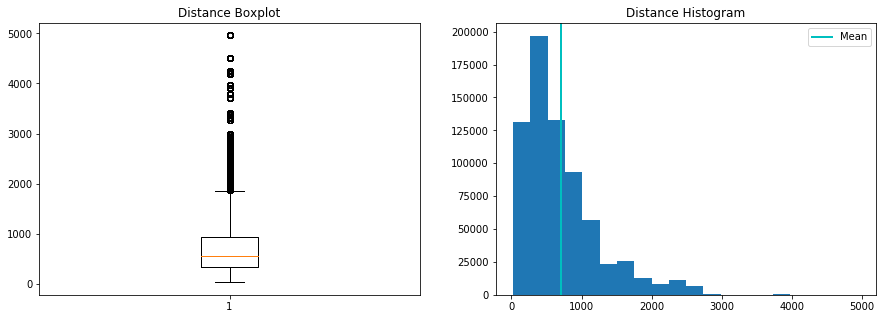

In [16]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.boxplot(flights['Distance'].dropna(how = 'any'))
plt.title('Distance Boxplot')

plt.subplot(1, 2, 2)
plt.hist(flights['Distance'].dropna(how = 'any'), bins=20)
plt.axvline(flights['Distance'].mean(), color='c', linestyle='solid', linewidth=2, label="Mean")
plt.legend(loc='upper right')
plt.title('Distance Histogram')

plt.show()

Most flights travel less than roughly 550 miles.  The furthest distance is almost 5,000 miles.

### Departure Delay
'DepDelay'

In [17]:
flights['DepDelay'].describe()

count    681898.000000
mean         11.938140
std          36.161271
min         -92.000000
25%          -4.000000
50%           0.000000
75%          11.000000
max        1355.000000
Name: DepDelay, dtype: float64

In [ ]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.boxplot(flights['DepDelay'].dropna(how = 'any'))
plt.title('Departure Delay Boxplot')

plt.subplot(1, 2, 2)
plt.hist(flights['DepDelay'].dropna(how = 'any'), bins=25)
plt.axvline(flights['DepDelay'].mean(), color='c', linestyle='solid', linewidth=2, label="Mean")
plt.legend(loc='upper right')
plt.title('Depature Delay Histogram')

plt.show()

Most flights are not delayed on departure, but there are a significant number of outliers of lengthly delays.

### Scheduled Elapsed Time
'CRSElapsedTime'

In [19]:
flights['CRSElapsedTime'].describe()

count    700867.000000
mean        126.690994
std          68.391777
min           1.000000
25%          77.000000
50%         109.000000
75%         157.000000
max        1435.000000
Name: CRSElapsedTime, dtype: float64

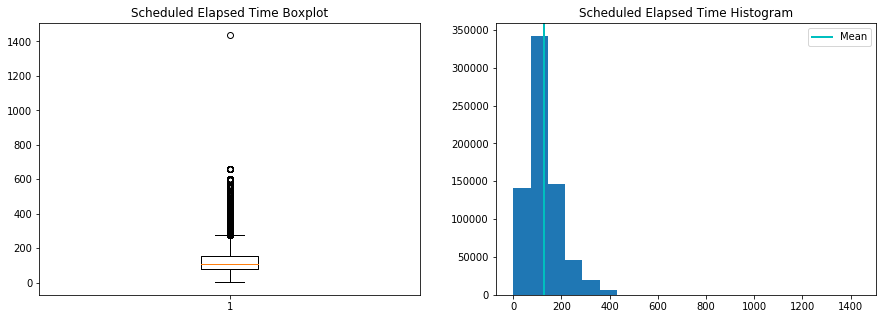

In [20]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.boxplot(flights['CRSElapsedTime'].dropna(how = 'any'))
plt.title('Scheduled Elapsed Time Boxplot')

plt.subplot(1, 2, 2)
plt.hist(flights['CRSElapsedTime'].dropna(how = 'any'), bins=20)
plt.axvline(flights['CRSElapsedTime'].mean(), color='c', linestyle='solid', linewidth=2, label="Mean")
plt.legend(loc='upper right')
plt.title('Scheduled Elapsed Time Histogram')

plt.show()

The average flight time os scheduled just over two hours.

## Bivariate Explorations

### Arrival Delay and Day of the Week

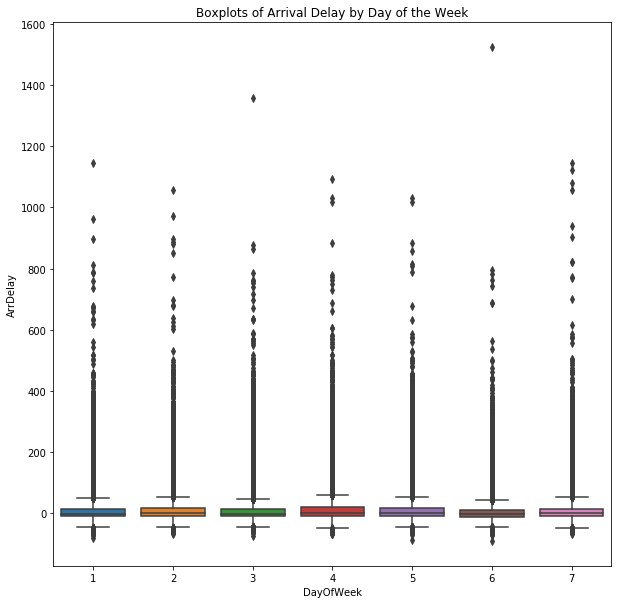

In [21]:
plt.figure(figsize=(10, 10))
plt.title('Boxplots of Arrival Delay by Day of the Week')
sns.boxplot(x="DayOfWeek", y="ArrDelay", data=flights)
plt.show()

### Arrival Delay and Airline Carrier

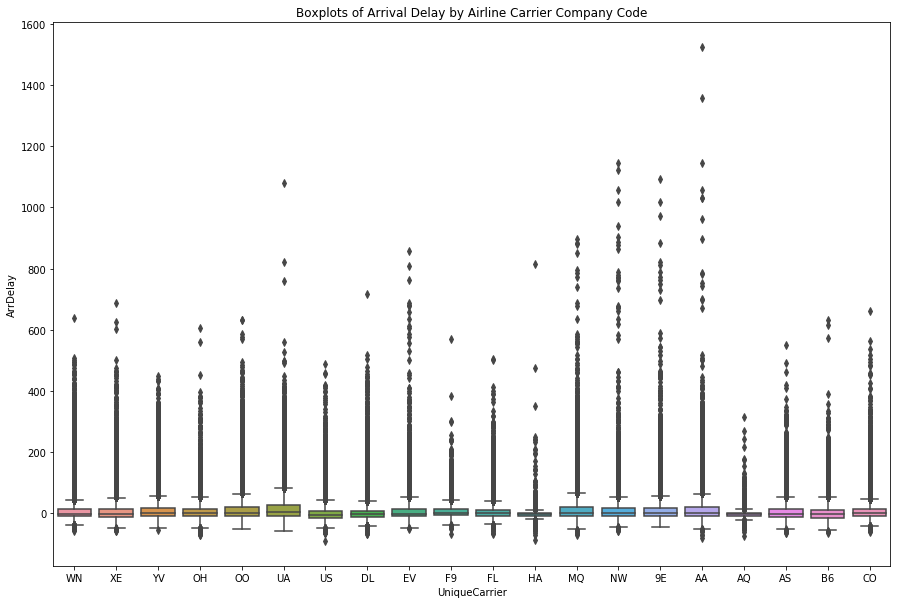

In [22]:
plt.figure(figsize=(15, 10))
plt.title('Boxplots of Arrival Delay by Airline Carrier Company Code')
sns.boxplot(x="UniqueCarrier", y="ArrDelay", data=flights)
plt.show()

In [23]:
flights[['ArrDelay', 'UniqueCarrier']].groupby('UniqueCarrier').describe()

ArrDelay                                                     
                  count       mean        std   min   25%  50%   75%     max
UniqueCarrier                                                               
9E              21624.0  12.267573  47.520789 -44.0 -10.0  0.0  17.0  1094.0
AA              50640.0  15.071998  45.201827 -80.0  -8.0  2.0  21.0  1525.0
AQ               4000.0  -2.512500  17.345621 -75.0  -9.0 -4.0   0.0   315.0
AS              12289.0   8.177964  38.549717 -66.0 -12.0 -1.0  14.0   550.0
B6              16207.0   4.858456  36.730645 -63.0 -15.0 -4.0  12.0   631.0
CO              24946.0   9.002926  35.122135 -60.0  -8.0  1.0  14.0   662.0
DL              36971.0   4.438208  33.081199 -69.0 -11.0 -2.0   9.0   717.0
EV              21945.0   9.170608  39.134050 -51.0 -10.0 -1.0  15.0   856.0
F9               7674.0   7.122231  25.776550 -67.0  -7.0  2.0  13.0   570.0
FL              20234.0   7.216220  31.598743 -68.0  -8.0  0.0  11.0   504.0
HA               4641.0  -2.519285  21.572734 -86.0  -8.0 -4.0   0.0   814.0
MQ              40878.0  15.115857  46.555887 -72.0  -9.0  0.0  21.0   897.0
NW              30583.0   9.394402  38.177997 -57.0  -8.0  2.0  16.0  1146.0
OH              18111.0   7.546905  34.075135 -72.0 -10.0  0.0  15.0   606.0
OO              46247.0  18.224469  48.750746 -51.0  -8.0  2.0  21.0   632.0
UA              36486.0  19.833059  50.336884 -58.0  -8.0  4.0  28.0  1081.0
US              38513.0   1.823384  30.277971 -91.0 -14.0 -5.0   9.0   487.0
WN             187117.0   8.804823  34.011678 -57.0  -8.0 -1.0  13.0   637.0
XE              40420.0   8.887333  38.033293 -59.0 -11.0 -1.0  14.0   687.0
YV              20666.0  14.497242  47.424168 -54.0 -10.0  0.0  16.0   449.0

There is variation between airlines regarding arrival delays, with means ranging from 2 minutes early to almost 20 munites late.

### Arrival Delay and Air Time

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


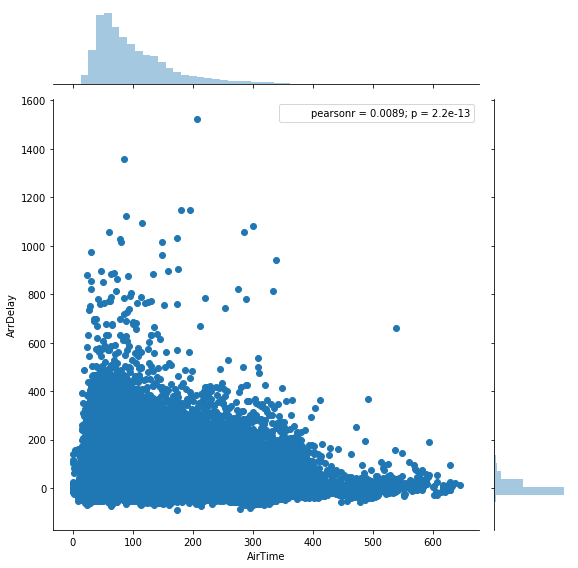

In [48]:
sns.jointplot(x="AirTime", y="ArrDelay", data=flights, size=8)

### Arrival Delay and Distance

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


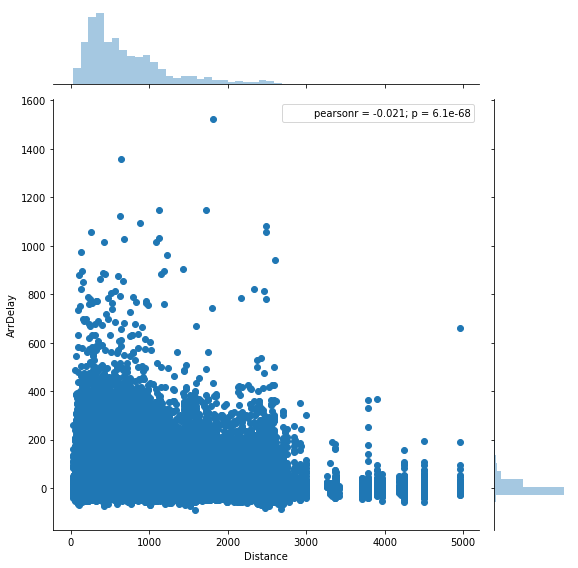

In [43]:
sns.jointplot(x="Distance", y="ArrDelay", data=flights, size=8)

### Arrival Delay and Departure Delay

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


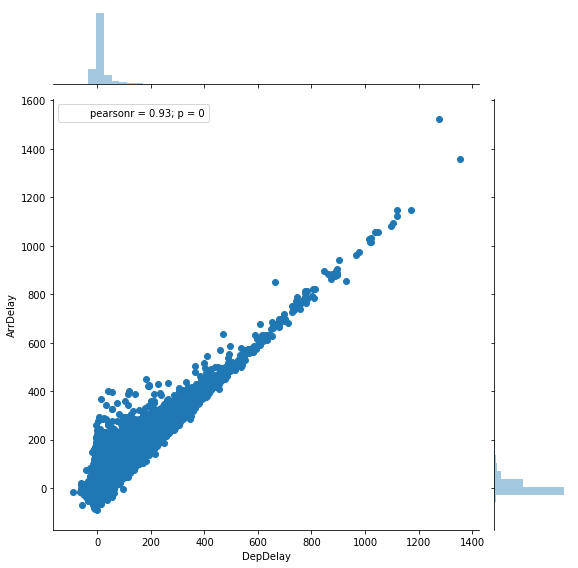

In [44]:
sns.jointplot(x="DepDelay", y="ArrDelay", data=flights, size=8)

### Arrival Delay and Scheduled Time

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


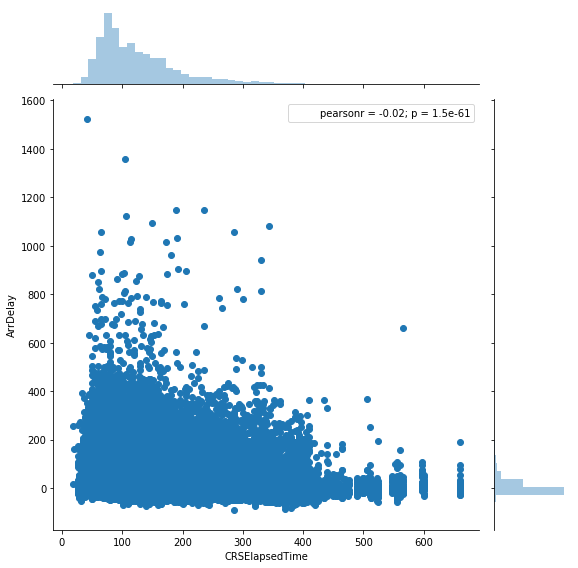

In [45]:
sns.jointplot(x="CRSElapsedTime", y="ArrDelay", data=flights, size=8)

### Pairplot

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


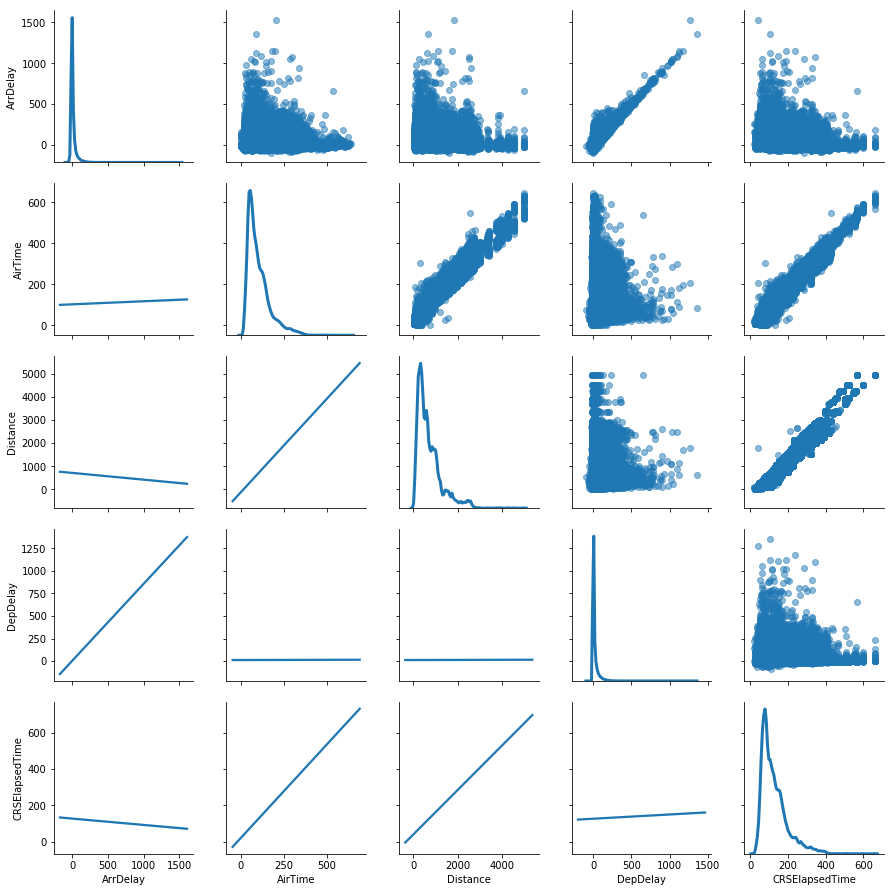

In [51]:
# Declare that you want to make a scatterplot matrix.
g = sns.PairGrid(flights[["ArrDelay", "AirTime", "Distance", "DepDelay", "CRSElapsedTime"]].dropna(), diag_sharey=False)
# Scatterplot.
g.map_upper(plt.scatter, alpha=.5)
# Fit line summarizing the linear relationship of the two variables.
g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))
# Give information about the univariate distributions of the variables.
g.map_diag(sns.kdeplot, lw=3)
plt.show()

A positive correlation is clearly evident between Arrival Delay and Departure Delay, with Airtime also appearing to have a slight positive correlation.  A negative correlation appears to be slight from Arrival Delay to Distance and Scheduled Duration (CRSElapsedTime).

### Comparing Categorial Variables: Day of the Week and Carrier

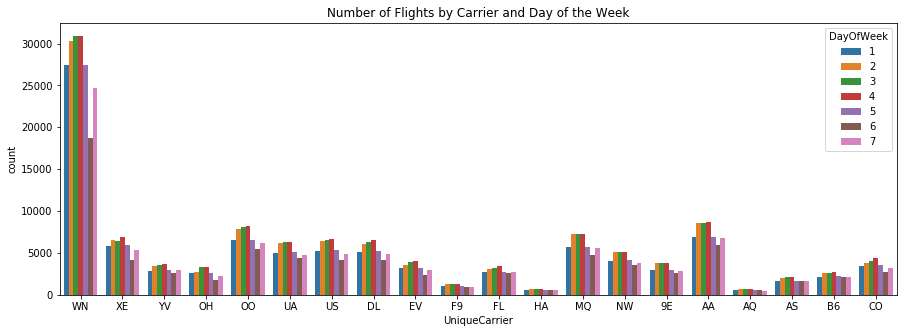

In [34]:
plt.figure(figsize=(15, 5))
plt.title('Number of Flights by Carrier and Day of the Week')
sns.countplot(x="UniqueCarrier", hue="DayOfWeek", data=flights)
plt.show()